In [1]:
# import the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the training dataset 
train=pd.read_csv(r'C:\Users\saggi\Downloads\train_titanic.csv')

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

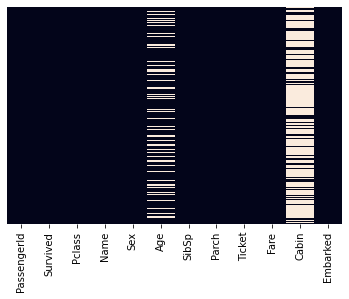

In [6]:
#checking the null values using heatmap 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

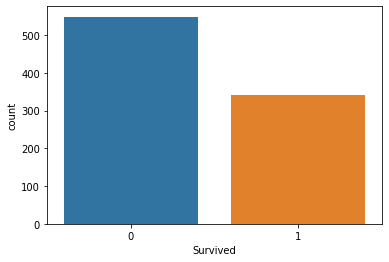

In [7]:
#checking the count of the survived column
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

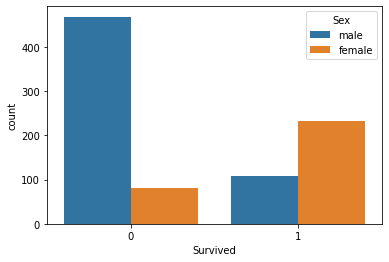

In [8]:
# checking the survival rate with respect to gender
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

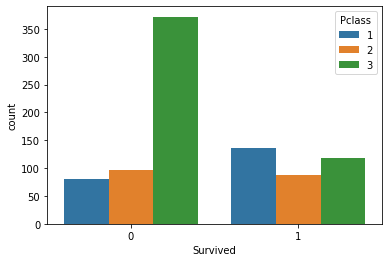

In [9]:
# checking the survival rate with respect to passengers class
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

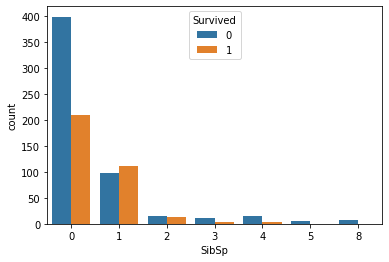

In [10]:
# checking the survival rate with respect to sibling spouse
sns.countplot(x='SibSp',hue='Survived',data=train)

C:\Users\saggi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

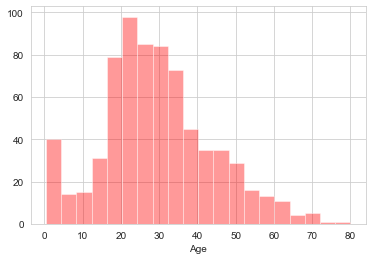

In [11]:
# Distribution of Age feature
sns.set_style('whitegrid')
sns.distplot(train['Age'],kde=False,color='red')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

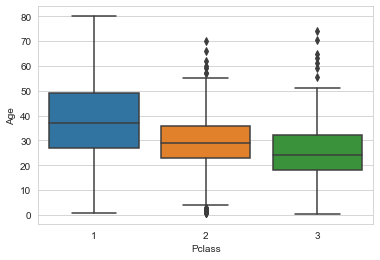

In [12]:
# Checking the median of each passenger class with respect to the age of the passengers.
sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:
# Creating a function that fills na vlaues of Age feature with respect to medians of each passenger class.
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 28
        
        else:
            return 25
        
    else:
        return Pclass

In [15]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

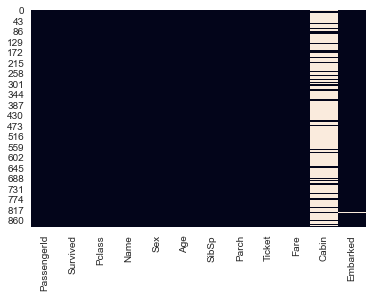

In [16]:
sns.heatmap(train.isnull(),cbar=False)

In [17]:
# Dropping the cabin feature as it contains more than 90% of the null values
train.drop('Cabin',axis=1,inplace=True)

In [18]:
# Handling categorical features
sex=pd.get_dummies(train['Sex'])
embarked=pd.get_dummies(train['Embarked'])

In [19]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [20]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
train.drop(['Sex','Embarked','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [22]:
train_1=pd.concat([train,sex,embarked],axis=1)

In [23]:
train_1.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
886,0,2,2.0,0,0,13.00,0,1,0,0,1
887,1,1,1.0,0,0,30.00,1,0,0,0,1
888,0,3,25.0,1,2,23.45,1,0,0,0,1
889,1,1,1.0,0,0,30.00,0,1,1,0,0
890,0,3,3.0,0,0,7.75,0,1,0,1,0


In [24]:
# assigning the target ariable with y value and remaining features with x value
y=train_1['Survived']
x=train_1.drop('Survived',axis=1)

In [25]:
x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,3.0,1,0,7.2500,0,1,0,0,1
1,1,1.0,1,0,71.2833,1,0,1,0,0
2,3,3.0,0,0,7.9250,1,0,0,0,1
3,1,1.0,1,0,53.1000,1,0,0,0,1
4,3,3.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,2.0,0,0,13.0000,0,1,0,0,1
887,1,1.0,0,0,30.0000,1,0,0,0,1
888,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1.0,0,0,30.0000,0,1,1,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 10), (268, 10), (623,), (268,))

In [30]:
y_train

442    0
145    0
710    1
833    0
112    0
      ..
440    1
165    1
7      0
219    0
326    0
Name: Survived, Length: 623, dtype: int64

In [31]:
#model building
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(x_train,y_train)

C:\Users\saggi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predict=model.predict(x_test)

In [35]:
predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.8059701492537313

In [38]:
accuracy=confusion_matrix(y_test,predict)

In [39]:
accuracy

array([[131,  25],
       [ 27,  85]], dtype=int64)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dmodel=DecisionTreeClassifier()

In [42]:
dmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
predict=dmodel.predict(x_test)

In [44]:
np.mean(predict==y_test)

0.8171641791044776

In [45]:
acc=accuracy_score(predict,y_test)

In [46]:
print(acc)

0.8171641791044776


In [47]:
confusionmatrix=confusion_matrix(y_test,predict)

In [48]:
confusionmatrix

array([[137,  19],
       [ 30,  82]], dtype=int64)

In [49]:
 from sklearn.ensemble import RandomForestClassifier

In [50]:
rmodel=RandomForestClassifier()

In [51]:
rmodel.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=rmodel.predict(x_test)

In [53]:
np.mean(y_pred==y_test)

0.8171641791044776

In [54]:
acc=accuracy_score(y_pred,y_test)

In [55]:
print(acc)

0.8171641791044776
